# Import the code needed to plot the confusion matrix 

In [1]:
import utils

# Add this to your inference notebook

ground truth list :  [2 3 2 3 1 1 0 0]
predicted list :  [2 3 2 3 0 0 3 2]


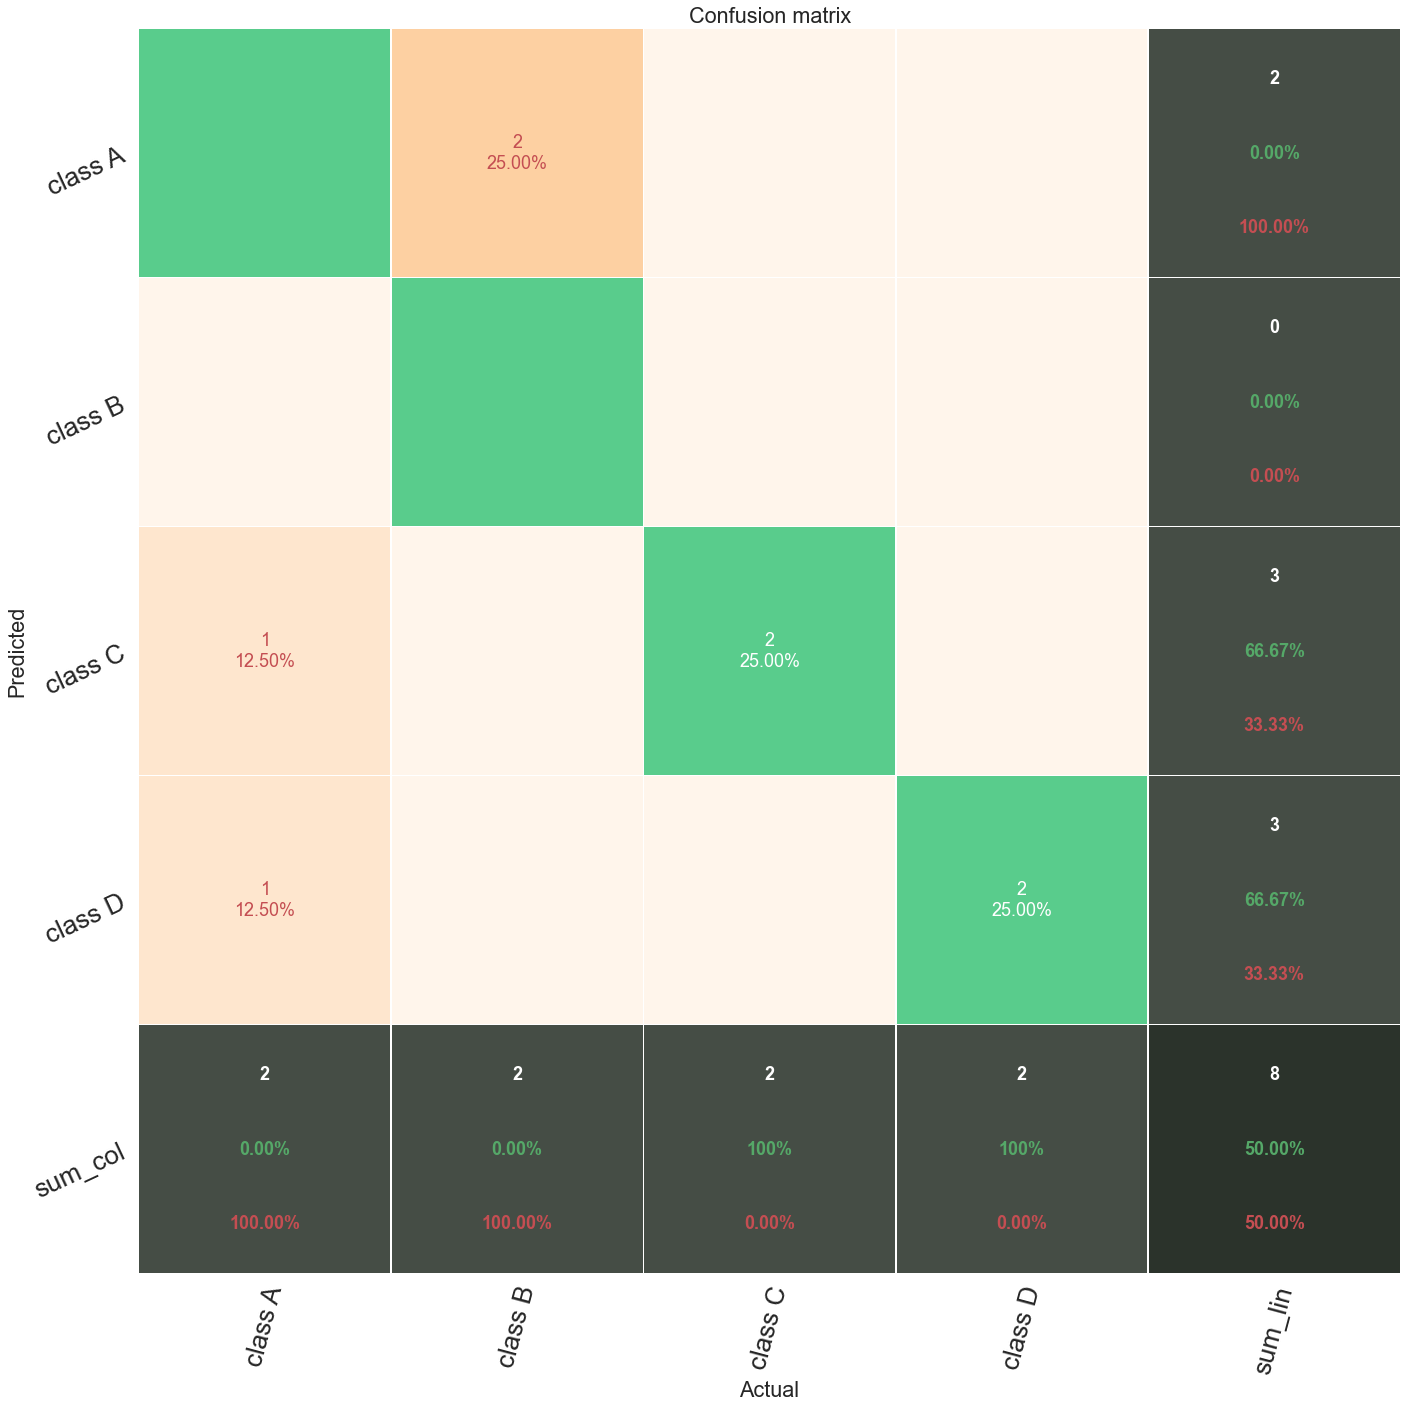

In [15]:
# an example of plotting confusion matrix.
# the first step consists of computing ground-truth and prediction vectors for all images.
# using these vectors, the plot_confusion_matrix_from_data function plots the CM and computes tps fps and fns
import pandas as pd
import numpy as np
import os 

#ground-truth and predictions lists
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []
"""
#compute gt_tot, pred_tot and mAP for each image in the test dataset
for image_id in dataset.image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]

    # Run the model
    results = model.detect([image], verbose=1)
    r = results[0]
    
    #compute gt_tot and pred_tot
    gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, r['class_ids'], r['rois'])
    gt_tot = np.append(gt_tot, gt)
    pred_tot = np.append(pred_tot, pred)
    
    #precision_, recall_, AP_ 
    AP_, precision_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
    #check if the vectors len are equal
    print("the actual len of the gt vect is : ", len(gt_tot))
    print("the actual len of the pred vect is : ", len(pred_tot))
    
    mAP_.append(AP_)
    print("Average precision of this image : ",AP_)
    print("The actual mean average precision for the whole images (matterport methode) ", sum(mAP_)/len(mAP_))
    print("Ground truth object : "+dataset.class_names[gt])
    print("Predicted object : "+dataset.class_names[pred])
  """  
gt_tot=gt_tot.astype(int)
pred_tot=pred_tot.astype(int)
#save the vectors of gt and pred
save_dir = "output"
gt_pred_tot_json = {"gt_tot" : gt_tot, "pred_tot" : pred_tot}
df = pd.DataFrame(gt_pred_tot_json)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
df.to_json(os.path.join(save_dir,"gt_pred_test.json"))
    
#print the confusion matrix and compute true postives, false positives and false negative for each class: 
#ps : you can controle the figure size and text format by choosing the right values
#tp, fp, fn = utils.plot_confusion_matrix_from_data(gt_tot, pred_tot, dataset.class_names, fz=18, figsize=(20,20), lw=0.5)

###########################################################################################################################

#since in this notebook i didnt run the loop above, here is an example of plotting using manual generated vectors :
#let 0 be the background class
#gt_tot=[1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,0,1,2,3,0,1,2,3,0,1,2,0]
#pred_tot=[1,2,3,3,2,1,1,2,3,1,2,3,1,2,0,2,2,2,3,1,0,0,3,2,1,2,0]

#supose we have 1 image containing the gt classes bellow :
gt_class_id = np.array([1,2,3,1,2,3])
#with the bbox :
gt_bbox = np.array([np.array([10,100,20,200]),np.array([100,10,200,20]),np.array([110,15,220,25]),np.array([20,200,20,200]),
                    np.array([90,15,220,20]),np.array([100,10,150,20])])
#and the model detected the classes : 
pred_class_id = np.array([2,3,2,3,2,3])
#with the bbox : 
pred_bbox = np.array([np.array([100,10,200,20]),np.array([110,15,220,25]),np.array([90,15,220,20]),np.array([101,20,100,21]),
                    np.array([500,20,1,20]),np.array([100,10,150,20])])

#for this image, the gt and pred lists are :    
gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, pred_class_id, pred_bbox)
gt_tot = np.append(gt_tot, gt)
pred_tot = np.append(pred_tot, pred)

print("ground truth list : ",gt_tot)
print("predicted list : ",pred_tot)

#here i didnt set the columns list, since in the code if columns is note specified 
#it generates automatically a list from "class A" to "class ..". in this example, class A should be the background
#Note : class A is the backround in this example
tp,fp,fn=utils.plot_confusion_matrix_from_data(gt_tot,pred_tot,fz=18, figsize=(20,20), lw=0.5)

In [16]:
print("tp for each class :",tp)
print("fp for each class :",fp)
print("fn for each class :",fn)

#eliminate the background class (class A) from tps fns and fns lists since it doesn't concern us anymore : 
del tp[0]
del fp[0]
del fn[0]
print("\n########################\n")
print("tp for each class :",tp)
print("fp for each class :",fp)
print("fn for each class :",fn)

tp for each class : [0, 0, 2, 2]
fp for each class : [2, 2, 0, 0]
fn for each class : [2, 0, 1, 1]

########################

tp for each class : [0, 2, 2]
fp for each class : [2, 0, 0]
fn for each class : [0, 1, 1]
